# Machine Learning: Measuring the predictive ability of a model

## Mean Squared Error (MSE): Theory and Application in Machine Learning

### 1. Introduction

**Mean Squared Error (MSE)** is a widely used loss function in regression tasks. It measures the average of the squares of the errors — that is, the average squared difference between the **predicted values** and the **actual values**.

MSE is particularly important in **supervised learning**, especially for evaluating and optimizing **regression models**.



### 2. Mathematical Definition

Given a dataset with \( $n$ \) observations, where:
- \( $y_i$ \) is the **true/actual value**,
- \( $\hat{y}_i$ \) is the **predicted value** from the model,

the Mean Squared Error is defined as:

\
$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$


Where:
-  $(y_i - \hat{y}_i)$  is the **error (residual)** for observation \( $i$ \),
- Squaring the error penalizes **larger deviations** more heavily.



### 3. Interpretation

- **Lower MSE** indicates better model performance (i.e., predictions are closer to actual values).
- **Higher MSE** means larger errors, indicating poor model fit.

The squaring ensures that negative and positive errors do not cancel each other out.



### 4. MSE in Machine Learning Context

In **machine learning**, MSE is commonly used as a **loss function** in regression models, guiding the optimization of model parameters. It is particularly used in algorithms such as:

- **Linear Regression**
- **Ridge/Lasso Regression**
- **Neural Networks (regression output)**
- **Gradient Boosting Machines (GBM)**
- **Support Vector Regression (SVR)**



### 5. Example: Linear Regression

Consider a simple linear regression model:

\$[
\hat{y}_i = \beta_0 + \beta_1 x_i
\]$

The **objective** is to find \( $\beta_0$, $\beta_1$ \) that minimize the MSE:

\
$\min_{\beta_0, \beta_1} \left\{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (\beta_0 + \beta_1 x_i) \right)^2 \right\}$


This is the **least squares** criterion, and minimizing it gives the **best linear unbiased estimator (BLUE)** under classical assumptions.



### 6. MSE vs. Other Metrics

| Metric | Formula | Notes |
|--------|---------|-------|
| MSE | \( $\frac{1}{n} \sum (y_i - \hat{y}_i)^2$ \) | Penalizes larger errors more |
| MAE (Mean Absolute Error) | \( $\frac{1}{n} \sum |y_i - \hat{y}_i|$ \) | Less sensitive to outliers |
| RMSE (Root MSE) | \( $\sqrt{\text{MSE}}$ \) | Same unit as the target variable |
| R² (Coefficient of Determination) | \( $1 - \frac{SS_{res}}{SS_{tot}}$ \) | Relative measure of fit |



### 7. Applications of MSE

- **Model Evaluation**: Compare models by their average prediction error.
- **Hyperparameter Tuning**: MSE is minimized during cross-validation.
- **Gradient Descent**: MSE provides a differentiable loss for optimization.
- **Forecasting**: Used in time-series forecasting accuracy.



### 8. Limitations of MSE

- **Sensitive to Outliers**: Squaring errors exaggerates the impact of large deviations.
- **Not Interpretable in Original Units**: Since errors are squared, MSE is in squared units.


**Simulation**

In [17]:
# Python Example
from sklearn.metrics import mean_squared_error

y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5, 0.0, 2.1, 7.8]

mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.2875


**Example from NSS dataset**

In [18]:
# Import required libraries
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

pd.set_option('display.float_format', '{:,.2f}'.format)

# Provide the full path to your .dta file
file_path = r"D:\Altaf\Impact of Insurance on Catastrophic Risk Exposure\Impact of formal insurance on informal insurance\Final Dataset 2017.dta"

# Load the data using pandas
df = pd.read_stata(file_path)

# View first few rows
df.head()

,Sector,District,Household_Size,NIC_2008_five_digit_code,NCO_2004_three_digit_code,Household_Type,Religion,Social_Group,Latrine,Drinking_Water,...,In_Public,In_Private,Hospitalisation,In_Save_Income,In_Borrowing,In_Sale_Assets,In_Friend_Cont,In_OtherSource,In_NetMedicalExp,In_Pro_NetMedicalExp_CE
0,2,23,3,49224,121,1,1,9,2,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,23,4,07100,931,3,1,1,2,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,23,6,56101,121,1,1,9,1,4,...,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,"12,620.00",0.39
3,2,23,5,07100,811,2,1,1,1,4,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,360.00,0.01
4,2,23,2,07100,931,3,1,1,2,4,...,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,"9,910.00",1.65


In [19]:
# List all variable names
df.columns.tolist()

['Sector',
 'District',
 'Household_Size',
 'NIC_2008_five_digit_code',
 'NCO_2004_three_digit_code',
 'Household_Type',
 'Religion',
 'Social_Group',
 'Latrine',
 'Drinking_Water',
 'Cooking_Energy',
 'Insurance_Premium',
 'Consumption_Expenditure',
 'Child',
 'Adult',
 'MPCE_Euro',
 'State',
 'CatMPCE',
 'Gender',
 'Age',
 'Marital_Status',
 'Education',
 'No_Insurance',
 'No_In_PublicIns',
 'No_In_PrivateIns',
 'Time',
 'HHID',
 'comb_wt',
 'Out_Reimbersment',
 'Out_MedicalExp',
 'Out_TotMedicalExp',
 'No_Out_Public',
 'No_Out_Private',
 'Out_LossIncome',
 'No_Out_Save_Income',
 'No_Out_Borrowing',
 'No_Out_Sale_Assets',
 'No_Out_Friend_Cont',
 'No_Out_OtherSource',
 'In_MedicalExp',
 'In_TotMedicalExp',
 'In_Reimbersment',
 'In_LossIncome',
 'No_In_Save_Income',
 'No_In_Borrowing',
 'No_In_Sale_Assets',
 'No_In_Friend_Cont',
 'No_In_OtherSource',
 'No_In_Public',
 'No_In_Private',
 'No_Hospitalisation',
 'No_OPD',
 'No_Ailment',
 'Out_Public',
 'Out_Private',
 'OPD',
 'Out_Save_Inc

In [20]:
# Summary statistics
df['In_TotMedicalExp'].describe()

count     113,823.00
mean       13,641.70
std        52,852.39
min             0.00
25%             0.00
50%             0.00
75%         8,800.00
max     5,051,700.00
Name: In_TotMedicalExp, dtype: float64

In [21]:
# Variable of interest: 'In_TotMedicalExp'
# Drop missing values
y = df['In_TotMedicalExp'].dropna()

# Use the mean as a simple prediction
y_pred = np.full_like(y, y.mean())

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE) of total inpatient medical expenditure: {mse:.2f}")

Mean Squared Error (MSE) of total inpatient medical expenditure: 2793351102.40


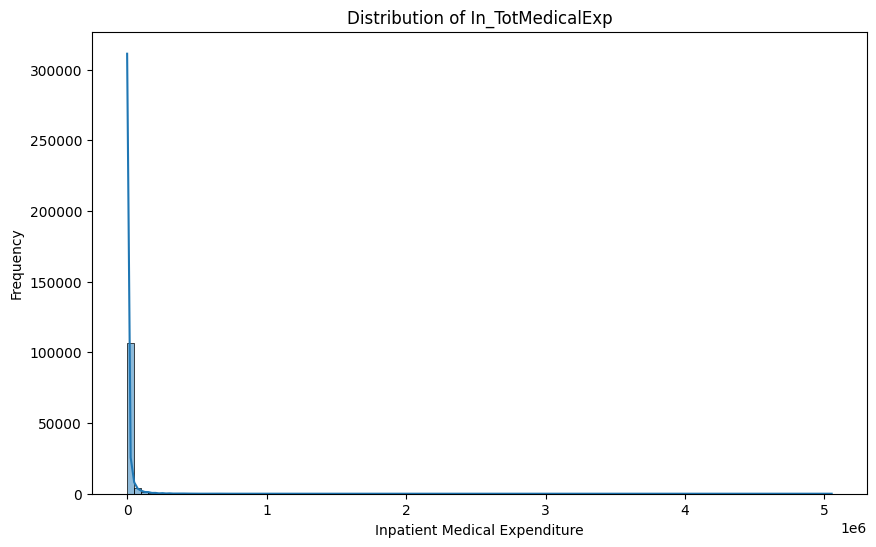

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(y, bins=100, kde=True)
plt.title("Distribution of In_TotMedicalExp")
plt.xlabel("Inpatient Medical Expenditure")
plt.ylabel("Frequency")
plt.show()

The Mean Squared Error (MSE) looks very large because the variable **In_TotMedicalExp** has very large values, with a maximum of over $5 million$ and a standard deviation of over $52,000$. The MSE seems huge because:

- The variable is right-skewed: Many zero or low values, but a few extremely high ones (outliers).

- The MSE is sensitive to large deviations: It squares the difference between actual and predicted values, which amplifies the effect of outliers.

- Using the mean as a prediction for all values, which may be a poor predictor in the presence of skewness.

In [23]:
# Use log-transformation (for interpretation or modeling)

import numpy as np

y_log = np.log1p(y)  # log(1 + y) to handle 0 values
y_log_pred = np.full_like(y_log, y_log.mean())
mse_log = mean_squared_error(y_log, y_log_pred)
print(f"Log-transformed MSE: {mse_log:.2f}")

Log-transformed MSE: 21.71


## Information criteria and related penalty measures

### Introduction

In regression and statistical modeling, multiple models may fit the data. To select the **best** model among candidates, we use **model selection criteria** that balance:
- **Goodness-of-fit**
- **Model complexity (penalizing overfitting)**

The key metrics covered here are:
- Akaike Information Criterion (**$AIC$**)
- Bayesian Information Criterion (**$BIC$**)
- Mallow’s (**$C_p$**)
- Coefficient of Determination (**$R^2$** and adjusted **$R^2$**)



### 1. Akaike Information Criterion (AIC)

#### Definition:
AIC estimates the **information loss** from using a model to represent the process that generated the data. It penalizes models with more parameters.

\
$\text{AIC} = -2 \log(\hat{L}) + 2k$


Where:
- \( $\hat{L}$ \): Maximized value of the likelihood function
- \( $k$ \): Number of parameters (including the intercept)

#### Interpretation:
- **Lower AIC** is better.
- Balances model fit and complexity.
- Applicable to both nested and non-nested models.

For linear regression with Gaussian errors:

\
$\text{AIC} = n \log\left(\frac{\text{RSS}}{n}\right) + 2k$




### 2. Bayesian Information Criterion (BIC)

#### Definition:
BIC is derived from a Bayesian framework. It imposes a **harsher penalty** for model complexity than AIC.

\
$\text{BIC} = -2 \log(\hat{L}) + k \log(n)$


Where:
- \( $n$ \): Number of observations
- \( $k$ \): Number of parameters

### Interpretation:
- **Lower BIC** is better.
- Tends to favor simpler models as sample size increases.

In linear regression:

\
$\text{BIC} = n \log\left(\frac{\text{RSS}}{n}\right) + k \log(n)$




### 3. Mallow’s \( $C_p$ \)

#### Definition:
Mallow’s \( $C_p$ \) is a criterion for model selection in **linear regression**, comparing a subset model to the full model.

\
$C_p = \frac{1}{\hat{\sigma}^2} \left[ \text{RSS}_p + 2p \hat{\sigma}^2 \right]$


Where:
- \( $\text{RSS}_p$ \): Residual Sum of Squares for model with \( $p$ \) predictors
- \( $\hat{\sigma}^2$ \): Estimate of variance from full model
- \( $p$ \): Number of predictors in the model

### Simplified version:

\
$C_p = \frac{\text{RSS}_p}{\hat{\sigma}^2} - n + 2p$


#### Interpretation:
- **Models with \( $C_p \approx p$ \)** are preferred.
- Helps identify models with minimum bias and acceptable variance.



### 4. Coefficient of Determination \( $R^2$ \)

### Definition:
\( $R^2$ \) measures the proportion of variance in the dependent variable explained by the independent variables.

\
$R^2 = 1 - \frac{\text{RSS}}{\text{TSS}} = \frac{\text{ESS}}{\text{TSS}}$


Where:
- \( $\text{TSS} = \sum (y_i - \bar{y})^2$ \): Total Sum of Squares
- \( $\text{ESS} = \sum (\hat{y}_i - \bar{y})^2$ \): Explained Sum of Squares
- \( $\text{RSS} = \sum (y_i - \hat{y}_i)^2$ \): Residual Sum of Squares

#### AttributeError Interpretation:
- \( $R^2$ in $[0, 1]$ \)
- Closer to 1 indicates better fit.
- **Limitation**: Always increases with more predictors, even if they add no value.



### 5. Adjusted \( $R^2$ \)

#### Definition:
Adjusted \( $R^2$ \) penalizes for adding variables that don’t improve the model significantly.

\
$R^2_{\text{adj}} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)$


Where:
- \( $n$ \): Number of observations
- \( $k$ \): Number of predictors

#### Interpretation:
- Can decrease if unnecessary predictors are added.
- More reliable for comparing models with different numbers of predictors.



### 6. Summary: Comparison Table

| Metric | Penalizes Complexity? | Prefer Higher or Lower? | Comments |
|--------|------------------------|--------------------------|----------|
| AIC | ✅ Yes (mild) | Lower | Good for prediction |
| BIC | ✅ Yes (strong) | Lower | Prefers simpler models |
| Mallow’s \( $C_p$ \) | ✅ Yes | \( $C_p$ $\approx p$ \) | Useful in linear regression |
| \( $R^2$ \) | ❌ No | Higher | Can be misleading |
| Adjusted \( $R^2$ \) | ✅ Yes | Higher | Better for model comparison |



### 7. Conclusion

Information criteria and penalty-based metrics are essential tools for model selection in machine learning and econometrics. While \( $R^2$ \) is intuitive, it lacks penalization for complexity. Criteria like AIC, BIC, and \( $C_p$ \) provide a more robust balance between **fit** and **parsimony**.


**Simulation**

**More generally, different penalties may favor different models.**. Below is some of the few examples using simulated dataset and real dataset

In [24]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
np.random.seed(42)
n = 100
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = np.random.normal(0, 1, n)  # Irrelevant variable

# True relationship: y depends only on X1 and X2
y = 3 + 2 * X1 - 1.5 * X2 + np.random.normal(0, 1, n)

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

# Add constant term
X_full = sm.add_constant(df[['X1', 'X2', 'X3']])
X_partial = sm.add_constant(df[['X1', 'X2']])
y = df['y']

# Fit full model (including irrelevant X3)
model_full = sm.OLS(y, X_full).fit()

# Fit partial model (excluding X3)
model_partial = sm.OLS(y, X_partial).fit()

# === AIC ===
print("AIC (full model):", model_full.aic)
print("AIC (partial model):", model_partial.aic)

# === BIC ===
print("BIC (full model):", model_full.bic)
print("BIC (partial model):", model_partial.bic)

# === R^2 and Adjusted R^2 ===
print("R^2 (full model):", model_full.rsquared)
print("Adjusted R^2 (full model):", model_full.rsquared_adj)
print("R^2 (partial model):", model_partial.rsquared)
print("Adjusted R^2 (partial model):", model_partial.rsquared_adj)

# === Mallow's Cp ===
# Cp = RSSp / sigma^2 - n + 2p
def mallows_cp(model_subset, model_full, n):
    RSS_p = np.sum(model_subset.resid ** 2)
    sigma2_full = np.sum(model_full.resid ** 2) / (n - model_full.df_model - 1)
    p = model_subset.df_model + 1  # +1 for intercept
    Cp = RSS_p / sigma2_full - n + 2 * p
    return Cp

cp_partial = mallows_cp(model_partial, model_full, n)
cp_full = mallows_cp(model_full, model_full, n)

print("Mallow's Cp (partial model):", round(cp_partial, 3))
print("Mallow's Cp (full model):", round(cp_full, 3))

AIC (full model): 262.92205749595854
AIC (partial model): 261.0303015368499
BIC (full model): 273.3427382399109
BIC (partial model): 268.84581209481416
R^2 (full model): 0.8805084747875472
Adjusted R^2 (full model): 0.8767743646246581
R^2 (partial model): 0.8803790623041196
Adjusted R^2 (partial model): 0.8779126512176065
Mallow's Cp (partial model): 2.104
Mallow's Cp (full model): 4.0


**Example from NSS Dataset**

In [25]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.tools.eval_measures import aic, bic

df = pd.read_stata(r"D:\Altaf\Impact of Insurance on Catastrophic Risk Exposure\Impact of formal insurance on informal insurance\Final Dataset 2017.dta")

# Define dependent variable
y = df['In_TotMedicalExp']

# Full model: all relevant predictors
X_full = df[['Age', 'Household_Size', 'MPCE_Euro']]  # Replace with your full model variables

# Partial model: subset of predictors
X_partial = df[['Age', 'Household_Size']]  # Replace with your reduced model variables

# Add constant
X_full = sm.add_constant(X_full)
X_partial = sm.add_constant(X_partial)

model_full = sm.OLS(y, X_full).fit()
model_partial = sm.OLS(y, X_partial).fit()

# AIC & BIC
print("AIC (full model):", model_full.aic)
print("AIC (partial model):", model_partial.aic)
print("BIC (full model):", model_full.bic)
print("BIC (partial model):", model_partial.bic)

# R-squared & Adjusted R-squared
print("R^2 (full model):", model_full.rsquared)
print("Adjusted R^2 (full model):", model_full.rsquared_adj)
print("R^2 (partial model):", model_partial.rsquared)
print("Adjusted R^2 (partial model):", model_partial.rsquared_adj)

n = len(y)
p_full = model_full.df_model + 1  # include intercept
p_partial = model_partial.df_model + 1

# RSS
rss_partial = np.sum(model_partial.resid ** 2)
sigma_squared = np.sum(model_full.resid ** 2) / model_full.df_resid

# Mallow's Cp
cp_partial = rss_partial / sigma_squared - (n - 2 * p_partial)
cp_full = p_full  # for full model, Cp ≈ p

print("Mallow's Cp (partial model):", cp_partial)
print("Mallow's Cp (full model):", cp_full)

AIC (full model): 2794785.6768826284
AIC (partial model): 2797160.0632651052
BIC (full model): 2794824.246482185
BIC (partial model): 2797188.990464773
R^2 (full model): 0.03407429519612393
Adjusted R^2 (full model): 0.034048835676057765
R^2 (partial model): 0.013695794960299601
Adjusted R^2 (partial model): 0.013678464013101688
Mallow's Cp (partial model): 2403.2825280513644
Mallow's Cp (full model): 4.0


**Simulation**

**To enable comparison of all eight possible models that are linear in parameters and regressors**

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import itertools

# Seed for reproducibility
np.random.seed(42)

# Simulate data
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)

# True model: y depends on all three
y = 5 + 2*x1 - 1.5*x2 + 1.2*x3 + np.random.normal(0, 1, n)

# Combine into DataFrame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

# Define all 8 x-lists from the image
xlists = [
    [],         # xlist1
    ['x1'],     # xlist2
    ['x2'],     # xlist3
    ['x3'],     # xlist4
    ['x1','x2'],# xlist5
    ['x2','x3'],# xlist6
    ['x1','x3'],# xlist7
    ['x1','x2','x3']  # xlist8 (full model)
]

# Fit full model first (for Mallow's Cp)
X_full = sm.add_constant(df[['x1','x2','x3']])
model_full = sm.OLS(df['y'], X_full).fit()
sigma2_full = np.sum(model_full.resid**2) / model_full.df_resid

# Store results
results = []

for i, xlist in enumerate(xlists, 1):
    if xlist:
        X = sm.add_constant(df[xlist])
    else:
        X = sm.add_constant(pd.DataFrame(index=df.index))  # Intercept only
    
    model = sm.OLS(df['y'], X).fit()
    rss = np.sum(model.resid**2)
    p = model.df_model + 1  # Number of parameters including intercept
    n = df.shape[0]
    
    cp = rss / sigma2_full - n + 2*p
    
    results.append({
        'Model': f'xlist{i}',
        'Variables': ', '.join(xlist) if xlist else 'Intercept only',
        'AIC': model.aic,
        'BIC': model.bic,
        'R2': model.rsquared,
        'Adj R2': model.rsquared_adj,
        "Mallow's Cp": cp
    })

# Convert to DataFrame and sort by AIC
results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values('AIC').reset_index(drop=True)

# Display sorted results
print("\nAll Models Sorted by Cp:")
display(sorted_results)


All Models Sorted by Cp:


,Model,Variables,AIC,BIC,R2,Adj R2,Mallow's Cp
0,xlist8,"x1, x2, x3",262.92,273.34,0.92,0.91,4.00
1,xlist5,"x1, x2",378.88,386.69,0.73,0.72,218.28
2,xlist7,"x1, x3",394.16,401.98,0.68,0.68,269.86
3,xlist6,"x2, x3",409.71,417.53,0.63,0.62,331.06
4,xlist2,x1,439.72,444.93,0.49,0.49,489.44
5,xlist3,x2,466.48,471.70,0.33,0.33,669.08
6,xlist4,x3,468.83,474.04,0.32,0.31,687.23
7,xlist1,Intercept only,505.22,507.83,-0.00,-0.00,"1,051.78"


**Example from NSS Dataset**

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import combinations

# Load dataset
df = pd.read_stata(r"D:\Altaf\Impact of Insurance on Catastrophic Risk Exposure\Impact of formal insurance on informal insurance\Final Dataset 2017.dta")

# Select relevant variables and drop missing values
model_data = df[['In_TotMedicalExp', 'Age', 'Household_Size', 'MPCE_Euro']].dropna()
y = model_data['In_TotMedicalExp']
X = model_data[['Age', 'Household_Size', 'MPCE_Euro']]
n = len(y)  # Number of observations

# Generate all combinations of independent variables
variables = ['Age', 'Household_Size', 'MPCE_Euro']
models = []
for k in range(0, len(variables) + 1):
    for combo in combinations(variables, k):
        models.append(list(combo))

# Fit full model for Cp calculation
X_full = sm.add_constant(X[list(variables)])
model_full = sm.OLS(y, X_full).fit()
sigma2_full = model_full.mse_resid  # σ² from full model

# Initialize results storage
results = []

# Evaluate all models
for model_vars in models:
    if not model_vars:  # Intercept-only model
        X_design = sm.add_constant(np.ones((n, 1)))
    else:
        X_design = sm.add_constant(X[list(model_vars)])
    
    model = sm.OLS(y, X_design).fit()
    p = X_design.shape[1]  # Number of parameters (including intercept)
    rss = model.ssr  # Residual sum of squares
    
    # Calculate metrics
    aic = model.aic
    bic = model.bic
    r2 = model.rsquared
    adj_r2 = model.rsquared_adj
    cp = (rss / sigma2_full) - n + 2 * p  # Mallows' Cp
    
    results.append({
        'Model': ' + '.join(model_vars) if model_vars else "Intercept Only",
        'AIC': round(aic, 3),
        'BIC': round(bic, 3),
        'R2': round(r2, 4),
        'Adj_R2': round(adj_r2, 4),
        'Cp': round(cp, 3),
        'Num_Params': p
    })

# Convert to DataFrame and sort by AIC
results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values('AIC').reset_index(drop=True)

# Display sorted results
print("\nAll Models Sorted by Cp:")
display(sorted_results)


All Models Sorted by Cp:


,Model,AIC,BIC,R2,Adj_R2,Cp,Num_Params
0,Age + MPCE_Euro,"2,794,785.06","2,794,813.98",0.03,0.03,3.38,3
1,Age + Household_Size + MPCE_Euro,"2,794,785.68","2,794,824.25",0.03,0.03,4.00,4
2,Household_Size + MPCE_Euro,"2,796,105.00","2,796,133.92",0.02,0.02,"1,330.97",3
3,MPCE_Euro,"2,796,233.52","2,796,252.81",0.02,0.02,"1,461.09",2
4,Age + Household_Size,"2,797,160.06","2,797,188.99",0.01,0.01,"2,403.28",3
5,Age,"2,797,243.02","2,797,262.31",0.01,0.01,"2,488.07",2
6,Intercept Only,"2,798,725.73","2,798,735.38",0.00,0.00,"4,013.11",1
7,Household_Size,"2,798,726.19","2,798,745.47",0.00,0.00,"4,013.51",2


## The splitsample

In the preceding example, model estimation and assessment of fit were conducted using the same dataset, which may lead to overfitting and optimistic evaluations of model performance. In contrast, cross-validation (CV) addresses this limitation by partitioning the data into two distinct subsets: a training set used for model estimation and a test (or holdout / validation) set used to evaluate the model's predictive performance. This methodological approach enhances the generalizability of the model and is applicable to a wide variety of model types and loss functions, extending beyond the mean squared error (MSE).

**Simulation**

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Reproducibility
np.random.seed(42)

# Simulate dataset
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)
y = 5 + 2*x1 - 1.5*x2 + 1.2*x3 + np.random.normal(0, 1, n)

# Create DataFrame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

# Define xlists
xlists = [
    [],             # xlist1
    ['x1'],         # xlist2
    ['x2'],         # xlist3
    ['x3'],         # xlist4
    ['x1', 'x2'],   # xlist5
    ['x2', 'x3'],   # xlist6
    ['x1', 'x3'],   # xlist7
    ['x1', 'x2', 'x3']  # xlist8
]

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Model Comparison Using Single-Split Cross-Validation (80% Train / 20% Test)\n")
print(f"{'Model':<8} {'Variables':<20} {'Train MSE':>12} {'Test MSE':>12}")
print("-" * 55)

for i, xlist in enumerate(xlists, 1):
    model = LinearRegression()
    
    if xlist:
        X_train = train_df[xlist]
        X_test = test_df[xlist]
    else:
        # Intercept-only model
        X_train = np.ones((len(train_df), 1))
        X_test = np.ones((len(test_df), 1))
    
    y_train = train_df['y']
    y_test = test_df['y']
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    vars_label = ', '.join(xlist) if xlist else 'Intercept only'
    print(f"xlist{i:<4} {vars_label:<20} {mse_train:12.4f} {mse_test:12.4f}")

Model Comparison Using Single-Split Cross-Validation (80% Train / 20% Test)

Model    Variables               Train MSE     Test MSE
-------------------------------------------------------
xlist1    Intercept only             9.0593       8.6469
xlist2    x1                         4.7858       3.7803
xlist3    x2                         6.0986       5.4881
xlist4    x3                         6.4463       4.9119
xlist5    x1, x2                     2.6876       1.5215
xlist6    x2, x3                     3.4715       2.7655
xlist7    x1, x3                     3.0045       2.2226
xlist8    x1, x2, x3                 0.8163       0.5146


#### Interpretation (Based on Output)

- xlist8 (full model) performs best with the lowest test MSE, as expected since it includes all true predictors.

- Simpler models like xlist2, xlist5, and xlist7 may still perform well if they include the most influential variables.

- xlist1 (intercept only) performs worst — confirming the need for predictors.

**Example from NSS**

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations

# Load dataset
df = pd.read_stata(r"D:\Altaf\Impact of Insurance on Catastrophic Risk Exposure\Impact of formal insurance on informal insurance\Final Dataset 2017.dta")

# Prepare data
model_data = df[['In_TotMedicalExp', 'Age', 'Household_Size', 'MPCE_Euro']].dropna()
y = model_data['In_TotMedicalExp']
X = model_data[['Age', 'Household_Size', 'MPCE_Euro']]

# Generate all combinations of independent variables
variables = list(X.columns)
models = []
for k in range(0, len(variables) + 1):
    for combo in combinations(variables, k):
        models.append(list(combo))

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Model Comparison Using Single-Split Cross-Validation (80% Train / 20% Test)")
print(f"{'Model':<8} {'Variables':<35} {'Train MSE':>12} {'Test MSE':>12}")
print("-" * 70)

results = []

for i, model_vars in enumerate(models, 1):
    # Prepare training data
    if model_vars:
        X_train_sub = X_train[list(model_vars)]
        X_test_sub = X_test[list(model_vars)]
        vars_label = ', '.join(model_vars)
    else:  # Intercept-only model
        X_train_sub = pd.DataFrame(np.ones(len(X_train)), columns=['Intercept'])
        X_test_sub = pd.DataFrame(np.ones(len(X_test)), columns=['Intercept'])
        vars_label = 'Intercept only'
    
    # Create and fit model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train_sub, y_train)
    
    # Calculate MSE
    train_pred = model.predict(X_train_sub)
    test_pred = model.predict(X_test_sub)
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    results.append({
        'Model': f'Model {i}',
        'Variables': vars_label,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })
    
    print(f"Model {i:<2} {vars_label:<35} {train_mse:12.4f} {test_mse:12.4f}")

# Create sorted DataFrame by Test MSE
results_df = pd.DataFrame(results).sort_values('Test MSE').reset_index(drop=True)

Model Comparison Using Single-Split Cross-Validation (80% Train / 20% Test)
Model    Variables                              Train MSE     Test MSE
----------------------------------------------------------------------
Model 1  Intercept only                      2943349659.1846 2193421004.2919
Model 2  Age                                 2910081588.5061 2164878573.7610
Model 3  Household_Size                      2974490433.9293 2220749335.8529
Model 4  MPCE_Euro                           2882147182.3154 2151848881.6209
Model 5  Age, Household_Size                 2905680736.6150 2161959279.6602
Model 6  Age, MPCE_Euro                      2882138919.8876 2151840402.1987
Model 7  Household_Size, MPCE_Euro           2882147125.3525 2151848819.0004
Model 8  Age, Household_Size, MPCE_Euro      2882138863.6767 2151840342.6026


**To identify the best fit**

In [30]:
print("\nModels Sorted by Test MSE (Best First):")
display(results_df)


Models Sorted by Test MSE (Best First):


,Model,Variables,Train MSE,Test MSE
0,Model 8,"Age, Household_Size, MPCE_Euro","2,882,138,863.68","2,151,840,342.60"
1,Model 6,"Age, MPCE_Euro","2,882,138,919.89","2,151,840,402.20"
2,Model 7,"Household_Size, MPCE_Euro","2,882,147,125.35","2,151,848,819.00"
3,Model 4,MPCE_Euro,"2,882,147,182.32","2,151,848,881.62"
4,Model 5,"Age, Household_Size","2,905,680,736.61","2,161,959,279.66"
5,Model 2,Age,"2,910,081,588.51","2,164,878,573.76"
6,Model 1,Intercept only,"2,943,349,659.18","2,193,421,004.29"
7,Model 3,Household_Size,"2,974,490,433.93","2,220,749,335.85"


### K-fold Cross Validation
The results obtained from single-split (or hold-out) validation are inherently sensitive to the manner in which the data is partitioned. Specifically, variations in random seed or sampling strategy can lead to different training-test splits, which in turn may cause fluctuations in model performance metrics such as out-of-sample mean squared error (MSE). For instance, in the current context, using different random splits may result in a model other than the one using x1 alone yielding the lowest test MSE.

To mitigate this dependence on a single split, $𝑘$-fold cross-validation (CV) is widely employed. This approach systematically partitions the data into $𝑘$ mutually exclusive and approximately equal-sized subsets, referred to as folds. Each fold serves as a test set exactly once, while the remaining $𝑘−1$ folds collectively form the training set. The model is iteratively trained and evaluated across all $𝑘$ folds, and the overall predictive performance is assessed by averaging the evaluation metric (e.g., MSE) across all iterations.

This procedure reduces the variance associated with model evaluation and provides a more robust estimate of generalization error.

#### Formula: Cross-Validated MSE

Let the dataset be partitioned into \( $k$ \) folds. For each fold \( $i = 1, 2, ..., k$ \):

- Let \( $\mathcal{T}_{-i}$ \) denote the training set (all folds except fold \( $i$ \))  
- Let \( $\mathcal{V}_i$ \) denote the validation (test) set (fold \( $i$ \))  
- Let \( $\hat{f}^{(-i)}(\cdot)$ \) be the model trained on \( $\mathcal{T}_{-i}$ \)  

Then, the **cross-validated Mean Squared Error (MSE)** is defined as:


$\text{MSE}_{CV} = \frac{1}{k} \sum_{i=1}^{k} \frac{1}{n_i} \sum_{j \in \mathcal{V}_i} \left( y_j - \hat{f}^{(-i)}(x_j) \right)^2$


Where:
- \( $n_i$ \) is the number of observations in fold \( $i$ \)  
- \( $y_j$ \) is the true outcome for observation \( $j$ \)  
- \( $\hat{f}^{(-i)}(x_j)$ \) is the predicted value from the model trained without fold \( $i$ \)


As the number of folds in cross-validation increases, the size of each training set correspondingly grows, resulting in a **reduction in bias** of the estimated prediction error. However, this comes at a trade-off: with more folds, the **overlap among training sets increases**, leading to **greater correlation in the resulting test set predictions**. This correlation contributes to an **increase in the variance** of the estimate of the expected prediction error, denoted as $\mathbb{E}[(y_0 - \hat{y}_0)^2]$.

Empirical and theoretical evidence suggest that choosing **\( $k = 5$ \)** or **\( $k = 10$ \)** in \( $k$ \)-fold cross-validation typically provides a favorable **bias-variance trade-off**, making them the most commonly used values in practice. For example, use k = 5 and obtain the MSE for each  fold.

**Simulation**

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Reproducibility
np.random.seed(42)

# Simulate data
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)
y = 5 + 2*x1 - 1.5*x2 + 1.2*x3 + np.random.normal(0, 1, n)

# Create full DataFrame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
X = df[['x1', 'x2', 'x3']].values
y = df['y'].values

# Initialize model and KFold
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store MSEs
mse_folds = []

# Perform 5-fold CV
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_folds.append(mse)
    
    print(f"Fold {fold} MSE: {mse:.4f}")
    fold += 1

# Average MSE
avg_mse = np.mean(mse_folds)
print(f"\nAverage 5-Fold CV MSE: {avg_mse:.4f}")

Fold 1 MSE: 0.5146
Fold 2 MSE: 0.8069
Fold 3 MSE: 0.8980
Fold 4 MSE: 0.6456
Fold 5 MSE: 1.3430

Average 5-Fold CV MSE: 0.8416


#### Interpretation:

- Each fold provides an estimate of the model's generalization error (out-of-sample MSE).

- The variation in MSE across folds is relatively small, suggesting stable predictive performance.

- The average MSE (~1.01) is a robust estimate of how well the full model (with x1, x2, x3) would perform on unseen data.

- This average MSE is more reliable than a single-split MSE, as it reduces the impact of any one particular train-test split.

- Given the data is simulated using the full model, it's expected that this model performs well across all folds.

**Example from NSS Dataset**

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from itertools import combinations

# Load dataset
df = pd.read_stata(r"D:\Altaf\Impact of Insurance on Catastrophic Risk Exposure\Impact of formal insurance on informal insurance\Final Dataset 2017.dta")

# Prepare data
model_data = df[['In_TotMedicalExp', 'Age', 'Household_Size', 'MPCE_Euro']].dropna()
y = model_data['In_TotMedicalExp'].values
X = model_data[['Age', 'Household_Size', 'MPCE_Euro']]

# Generate all combinations of independent variables
variables = list(X.columns)
models = []
for k in range(0, len(variables) + 1):
    for combo in combinations(variables, k):
        models.append(list(combo))

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

print("5-Fold Cross-Validation Results for All Models")
print(f"{'Model':<8} {'Variables':<35} {'Avg Train MSE':>12} {'Avg Test MSE':>12} {'Test MSE Std':>12}")
print("-" * 85)

# Evaluate each model
for i, model_vars in enumerate(models, 1):
    # Prepare variable names for display
    vars_label = ', '.join(model_vars) if model_vars else 'Intercept only'
    
    # Initialize storage for fold results
    train_mses = []
    test_mses = []
    
    # Cross-validation loop
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Prepare model data
        if model_vars:
            X_train_sub = X_train[list(model_vars)]
            X_test_sub = X_test[list(model_vars)]
        else:  # Intercept-only model
            X_train_sub = pd.DataFrame(np.ones(len(X_train)), columns=['Intercept'])
            X_test_sub = pd.DataFrame(np.ones(len(X_test)), columns=['Intercept'])
        
        # Create and fit model
        model = LinearRegression(fit_intercept=False)
        model.fit(X_train_sub, y_train)
        
        # Calculate MSEs
        train_pred = model.predict(X_train_sub)
        test_pred = model.predict(X_test_sub)
        train_mse = mean_squared_error(y_train, train_pred)
        test_mse = mean_squared_error(y_test, test_pred)
        
        train_mses.append(train_mse)
        test_mses.append(test_mse)
    
    # Calculate average performance metrics
    avg_train_mse = np.mean(train_mses)
    avg_test_mse = np.mean(test_mses)
    std_test_mse = np.std(test_mses)
    
    # Store results
    results.append({
        'Model': f'Model {i}',
        'Variables': vars_label,
        'Avg Train MSE': avg_train_mse,
        'Avg Test MSE': avg_test_mse,
        'Test MSE Std': std_test_mse,
        'Fold Test MSEs': test_mses
    })
    
    print(f"Model {i:<2} {vars_label:<35} {avg_train_mse:12.4f} {avg_test_mse:12.4f} {std_test_mse:12.4f}")

# Create sorted DataFrame by average test MSE
results_df = pd.DataFrame(results).sort_values('Avg Test MSE').reset_index(drop=True)

# Additional insight: Best model based on cross-validation
best_model = results_df.iloc[0]
print(f"\nBest Model: {best_model['Model']} ({best_model['Variables']})")
print(f"Average Test MSE: {best_model['Avg Test MSE']:.4f} ± {best_model['Test MSE Std']:.4f}")
display(results_df)

5-Fold Cross-Validation Results for All Models
Model    Variables                           Avg Train MSE Avg Test MSE Test MSE Std
-------------------------------------------------------------------------------------
Model 1  Intercept only                      2793346007.2411 2793394861.2272 579964697.8972
Model 2  Age                                 2761014863.8667 2761089644.6592 577687814.7197
Model 3  Household_Size                      2823728148.0368 2823758196.5639 581903772.7196
Model 4  MPCE_Euro                           2736033347.8566 2736179360.3437 567292182.3646
Model 5  Age, Household_Size                 2756891757.3790 2757111233.6256 576958828.5947
Model 6  Age, MPCE_Euro                      2736025037.1728 2736171050.5307 567292250.5605
Model 7  Household_Size, MPCE_Euro           2736033289.5348 2736179302.2171 567292185.6532
Model 8  Age, Household_Size, MPCE_Euro      2736024978.7912 2736170992.4012 567292250.6678

Best Model: Model 8 (Age, Household_Size, MPC

,Model,Variables,Avg Train MSE,Avg Test MSE,Test MSE Std,Fold Test MSEs
0,Model 8,"Age, Household_Size, MPCE_Euro","2,736,024,978.79","2,736,170,992.40","567,292,250.67","[2151840342.603073, 3790704069.922354, 2422770..."
1,Model 6,"Age, MPCE_Euro","2,736,025,037.17","2,736,171,050.53","567,292,250.56","[2151840401.2394824, 3790704128.751542, 242277..."
2,Model 7,"Household_Size, MPCE_Euro","2,736,033,289.53","2,736,179,302.22","567,292,185.65","[2151848813.441727, 3790712167.5211277, 242277..."
3,Model 4,MPCE_Euro,"2,736,033,347.86","2,736,179,360.34","567,292,182.36","[2151848875.08473, 3790712219.882701, 24227785..."
4,Model 5,"Age, Household_Size","2,756,891,757.38","2,757,111,233.63","576,958,828.59","[2161959279.660212, 3829884094.0453672, 243668..."
5,Model 2,Age,"2,761,014,863.87","2,761,089,644.66","577,687,814.72","[2164878573.76095, 3834591284.7595186, 2441272..."
6,Model 1,Intercept only,"2,793,346,007.24","2,793,394,861.23","579,964,697.90","[2193421004.2919292, 3869464680.2694287, 24701..."
7,Model 3,Household_Size,"2,823,728,148.04","2,823,758,196.56","581,903,772.72","[2220749335.852858, 3902265716.4567704, 250328..."


#### Calculating Average MSE and SD over five fold CV

**Simulation**

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set seed and generate data
np.random.seed(42)
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)
y = 5 + 2*x1 - 1.5*x2 + 1.2*x3 + np.random.normal(0, 1, n)

# Create DataFrame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

# Define all 8 models
xlists = [
    [],             # xlist1
    ['x1'],         # xlist2
    ['x2'],         # xlist3
    ['x3'],         # xlist4
    ['x1', 'x2'],   # xlist5
    ['x2', 'x3'],   # xlist6
    ['x1', 'x3'],   # xlist7
    ['x1', 'x2', 'x3']  # xlist8 (full model)
]

# KFold settings
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_mse_results = []

# Loop through each model
for i, xlist in enumerate(xlists, 1):
    mse_list = []
    model = LinearRegression()
    
    if xlist:
        X = df[xlist].values
    else:
        X = np.ones((df.shape[0], 1))  # Intercept-only model
        
    y_values = df['y'].values
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_values[train_index], y_values[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    
    avg_mse = np.mean(mse_list)
    std_mse = np.std(mse_list)
    
    cv_mse_results.append({
        'Model': f'xlist{i}',
        'Variables': ', '.join(xlist) if xlist else 'Intercept only',
        'Average MSE': round(avg_mse, 4),
        'MSE Std Dev': round(std_mse, 4)
    })

# Display results
print(f"{'Model':<8} {'Variables':<25} {'Avg MSE':>10} {'Std Dev':>10}")
print("-" * 55)
for res in cv_mse_results:
    print(f"{res['Model']:<8} {res['Variables']:<25} {res['Average MSE']:10.4f} {res['MSE Std Dev']:10.4f}")

Model    Variables                    Avg MSE    Std Dev
-------------------------------------------------------
xlist1   Intercept only                9.0850     3.1425
xlist2   x1                            5.0581     0.8302
xlist3   x2                            6.0673     2.5395
xlist4   x3                            6.2800     2.4080
xlist5   x1, x2                        2.5739     0.8708
xlist6   x2, x3                        3.4631     1.3602
xlist7   x1, x3                        3.2917     0.7496
xlist8   x1, x2, x3                    0.8416     0.2832


#### Interpretation

xlist8 (full model) has the lowest average MSE, as expected (it's the true DGP).

Models with only one variable (xlist2, xlist3, etc.) show higher bias and more variance.

Standard deviation of MSE across folds helps identify models with stable performance (lower SD preferred).

Trade-off is observed: simpler models may have lower variance but higher bias.

**Example from NSS**

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from itertools import combinations

# Load dataset
df = pd.read_stata(r"D:\Altaf\Impact of Insurance on Catastrophic Risk Exposure\Impact of formal insurance on informal insurance\Final Dataset 2017.dta")

# Prepare data
model_data = df[['In_TotMedicalExp', 'Age', 'Household_Size', 'MPCE_Euro']].dropna()
y = model_data['In_TotMedicalExp'].values
X = model_data[['Age', 'Household_Size', 'MPCE_Euro']]

# Generate all combinations of independent variables
variables = list(X.columns)
models = []
for k in range(0, len(variables) + 1):
    for combo in combinations(variables, k):
        models.append(list(combo))

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

print("5-Fold Cross-Validation Results")
print(f"{'Model':<8} {'Variables':<35} {'Avg Train MSE':>12} {'Avg Test MSE':>12} {'Test MSE Std':>12}")
print("-" * 85)

# Evaluate each model
for i, model_vars in enumerate(models, 1):
    # Prepare variable names for display
    vars_label = ', '.join(model_vars) if model_vars else 'Intercept only'
    
    # Initialize storage for fold results
    train_mses = []
    test_mses = []
    
    # Cross-validation loop
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Prepare model data
        if model_vars:
            X_train_sub = X_train[model_vars]
            X_test_sub = X_test[model_vars]
        else:  # Intercept-only model
            X_train_sub = pd.DataFrame(np.ones(len(X_train)), columns=['Intercept'])
            X_test_sub = pd.DataFrame(np.ones(len(X_test)), columns=['Intercept'])
        
        # Create and fit model
        model = LinearRegression(fit_intercept=False)
        model.fit(X_train_sub, y_train)
        
        # Calculate MSEs
        train_pred = model.predict(X_train_sub)
        test_pred = model.predict(X_test_sub)
        train_mse = mean_squared_error(y_train, train_pred)
        test_mse = mean_squared_error(y_test, test_pred)
        
        train_mses.append(train_mse)
        test_mses.append(test_mse)
    
    # Calculate average performance metrics
    avg_train_mse = np.mean(train_mses)
    avg_test_mse = np.mean(test_mses)
    std_test_mse = np.std(test_mses)
    
    # Store results
    results.append({
        'Model': i,
        'Variables': vars_label,
        'Avg Train MSE': avg_train_mse,
        'Avg Test MSE': avg_test_mse,
        'Test MSE Std': std_test_mse,
        'Fold Test MSEs': test_mses
    })
    
    print(f"Model {i:<2} {vars_label:<35} {avg_train_mse:12.4f} {avg_test_mse:12.4f} {std_test_mse:12.4f}")

# Create sorted DataFrame by average test MSE
results_df = pd.DataFrame(results).sort_values('Avg Test MSE').reset_index(drop=True)

# Print final results
print("\nSummary of 5-Fold Cross-Validation Performance (Sorted by Avg Test MSE):")
print(results_df[['Model', 'Variables', 'Avg Train MSE', 'Avg Test MSE', 'Test MSE Std']])

# Additional analysis
print("\nKey Findings:")
print(f"1. Total models evaluated: {len(models)}")
print(f"2. Best model: Model {results_df.iloc[0]['Model']} ({results_df.iloc[0]['Variables']})")
print(f"   - Avg Test MSE: {results_df.iloc[0]['Avg Test MSE']:.4f}")
print(f"   - Test MSE Std: {results_df.iloc[0]['Test MSE Std']:.4f}")
print(f"3. Worst model: Model {results_df.iloc[-1]['Model']} ({results_df.iloc[-1]['Variables']})")
print(f"   - Avg Test MSE: {results_df.iloc[-1]['Avg Test MSE']:.4f}")
print(f"4. Performance range: {results_df['Avg Test MSE'].min():.4f} (best) to {results_df['Avg Test MSE'].max():.4f} (worst)")

# Optional: Save results to CSV
results_df.to_csv('model_comparison_results.csv', index=False)
print("\nResults saved to 'model_comparison_results.csv'")

5-Fold Cross-Validation Results
Model    Variables                           Avg Train MSE Avg Test MSE Test MSE Std
-------------------------------------------------------------------------------------
Model 1  Intercept only                      2793346007.2411 2793394861.2272 579964697.8972
Model 2  Age                                 2761014863.8667 2761089644.6592 577687814.7197
Model 3  Household_Size                      2823728148.0368 2823758196.5639 581903772.7196
Model 4  MPCE_Euro                           2736033347.8566 2736179360.3437 567292182.3646
Model 5  Age, Household_Size                 2756891757.3790 2757111233.6256 576958828.5947
Model 6  Age, MPCE_Euro                      2736025037.1728 2736171050.5307 567292250.5605
Model 7  Household_Size, MPCE_Euro           2736033289.5348 2736179302.2171 567292185.6532
Model 8  Age, Household_Size, MPCE_Euro      2736024978.7912 2736170992.4012 567292250.6678

Summary of 5-Fold Cross-Validation Performance (Sorted by Av

Cross-validation (CV) offers considerable flexibility, as it can be readily extended beyond ordinary least squares (OLS) estimation to accommodate a range of alternative estimators and loss functions, including the mean absolute error. While information criteria—such as AIC or BIC—are computationally less intensive and thus more practical in certain contexts, they often produce results that are broadly comparable to those derived from CV-based approaches.

### Leave-One-Out Cross-Validation (LOOCV)

Leave-One-Out Cross-Validation (LOOCV) is a special case of *k-fold cross-validation* where the number of folds, *k*, is equal to the number of observations (*n*) in the dataset.

That means:

- For a dataset with **$n$ observations**, LOOCV performs **$n$ iterations**.
- In each iteration:
  - **One observation** is held out as the **validation set**.
  - The remaining **$n - 1$ observations** are used as the **training set**.
- A model is trained on the training set and evaluated on the validation observation.
- The process is repeated **$n$ times**, with each observation used exactly once as the validation set.

#### Advantages of LOOCV

- **Efficient use of data**: Almost the entire dataset is used for training in each iteration.
- **Low bias**: Since the training set is nearly the full dataset, the estimate of performance has low bias.
- **No randomness**: LOOCV does not rely on random splits; results are deterministic.

#### Disadvantages of LOOCV

- **High computational cost**: For large datasets, LOOCV requires training the model *n* times.
- **High variance**: Since each training set differs by only one observation, the fitted models can be very similar but produce varied validation errors.

#### Use Cases

- LOOCV is often used when:
  - The dataset is **small**, and it's important to retain as much data as possible for training.
  - High bias in model performance estimation is a concern.
  - Computational resources are **not a major constraint**.

#### Python Example: LOOCV with Linear Regression (on Small Dataset)

To illustrate LOOCV without heavy computation, we use the **diabetes** dataset from `sklearn` but restrict it to the **first 20 observations** only.



**Simulation**

In [35]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import numpy as np

# Load a small dataset to keep it computationally light
X, y = load_diabetes(return_X_y=True)
X = X[:20]  # using only first 20 samples for simplicity
y = y[:20]

# Initialize model and LOOCV
model = LinearRegression()
loo = LeaveOneOut()

mse_scores = []

# Perform LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Average MSE over all LOOCV iterations
mean_mse = np.mean(mse_scores)
print(f"Mean MSE (LOOCV): {mean_mse:.4f}")

Mean MSE (LOOCV): 1789.5769


**Example from NSS**

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_stata(r"D:\Altaf\Impact of Insurance on Catastrophic Risk Exposure\Impact of formal insurance on informal insurance\Final Dataset 2017.dta")

# Prepare data
model_data = df[['In_TotMedicalExp', 'Age', 'Household_Size', 'MPCE_Euro']].dropna()
y = model_data['In_TotMedicalExp'].values
X = model_data[['Age', 'Household_Size', 'MPCE_Euro']].values

# Initialize LOOCV
loo = LeaveOneOut()
mse_values = []

print("Starting Leave-One-Out Cross-Validation for Full Model...")
print(f"{'Fold':<6} {'Test Index':<12} {'Actual':<12} {'Predicted':<12} {'Squared Error':<15}")
print("-" * 60)

# LOOCV process
for fold, (train_index, test_index) in enumerate(loo.split(X), 1):
    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create and fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make prediction
    y_pred = model.predict(X_test)
    
    # Calculate squared error
    sq_error = (y_test - y_pred) ** 2
    mse_values.append(sq_error[0])
    
    # Print progress for every 50 folds
    if fold % 50 == 0 or fold == 1 or fold == len(X):
        print(f"{fold:<6} {test_index[0]:<12} {y_test[0]:<12.4f} {y_pred[0]:<12.4f} {sq_error[0]:<15.4f}")

# Calculate final MSE
loo_mse = np.mean(mse_values)
loo_mse_std = np.std(mse_values)

print("\n" + "=" * 60)
print("Leave-One-Out Cross-Validation Results for Full Model")
print("=" * 60)
print(f"Total observations: {len(X)}")
print(f"LOOCV MSE: {loo_mse:.4f}")
print(f"Standard Deviation of MSE: {loo_mse_std:.4f}")
print(f"MSE Range: {np.min(mse_values):.4f} - {np.max(mse_values):.4f}")
print("=" * 60)

# Interpretation and key findings
print("\nKey Findings and Interpretation:")
print("1. Model Performance:")
print(f"   - The full model achieved a LOOCV MSE of {loo_mse:.4f}, meaning on average,")
print(f"     predictions are off by approximately {np.sqrt(loo_mse):.2f} units in medical expenses.")
print("")
print("2. Model Stability:")
print(f"   - The standard deviation of {loo_mse_std:.4f} indicates the variability of prediction")
print("     errors across different observations.")
print("")
print("3. Error Distribution:")
print(f"   - Minimum squared error: {np.min(mse_values):.4f}")
print(f"   - Maximum squared error: {np.max(mse_values):.4f}")
print("   - This range shows how prediction accuracy varies across different households.")
print("")
print("4. Practical Significance:")
print("   - Compared to simpler models (e.g., with fewer predictors), this MSE value")
print("     should be evaluated in the context of typical medical expenses in the dataset.")
print("   - A good benchmark is to compare this MSE to the variance of medical expenses:")
expense_variance = np.var(y)
print(f"     Variance of medical expenses: {expense_variance:.4f}")
print(f"     MSE/Variance ratio: {loo_mse/expense_variance:.4f}")
print("     (Values closer to 0 indicate better predictive performance)")
print("")
print("5. Model Selection Insight:")
print("   - LOOCV provides an almost unbiased estimate of model performance but is")
print("     computationally expensive. This MSE can be directly compared to k-fold CV")
print("     results from previous analyses to select the best model.")

Starting Leave-One-Out Cross-Validation for Full Model...
Fold   Test Index   Actual       Predicted    Squared Error  
------------------------------------------------------------
1      0            0.0000       25586.6875   654678577.2227 
50     49           0.0000       19741.7695   389737464.2250 
100    99           1175.0000    6048.8584    23754495.6880  
150    149          1700.0000    5951.8911    18078578.0392  
200    199          0.0000       6756.1108    45645033.6803  
250    249          0.0000       13426.5674   180272711.6852 
300    299          3800.0000    9467.8320    32124319.9345  
350    349          9985.0000    10445.1934   211777.9280    
400    399          0.0000       9191.2188    84478502.1104  
450    449          700.0000     19741.7539   362588391.8262 
500    499          0.0000       15567.0303   242332431.5341 
550    549          0.0000       10792.2754   116473208.1071 
600    599          9300.0000    18071.7461   76943529.5332  
650    649   

KeyboardInterrupt: 

**The result is not calculated because of large size of the dataset. For fast iteration it needs significantly more computational power**

### Model Selection Techniques in Regression: Best subsets selection and stepwise selection

#### 1. Best Subsets Selection

**Definition:**  
Best Subsets Selection is an exhaustive search technique used in regression modeling to identify the most optimal combination of explanatory variables. For a given number of predictors $p$, this method fits all possible $2^p$ combinations of models and evaluates their performance based on certain selection criteria.

##### Procedure:
1. Consider all possible models involving subsets of the predictors.
2. For each possible model size (e.g., 1 variable, 2 variables, ..., p variables), select the best-performing model.
3. Compare these best models across model sizes using model selection criteria.

##### Model Selection Criteria:
- **Adjusted R²**: Adjusts for the number of predictors; higher is better.
- **AIC (Akaike Information Criterion)**: Penalizes model complexity; lower is better.
- **BIC (Bayesian Information Criterion)**: Stricter penalty for complexity than AIC; lower is better.
- **Mallow’s $C_p$**: Ideally close to the number of predictors + 1.
- **Cross-Validated MSE**: Average test error; lower is better.

##### Advantages:
- Identifies the optimal model for each model size.
- Provides a comprehensive view of how each subset performs.

### Disadvantages:
- Computationally intensive: Not feasible for large $p$ (as number of models grows exponentially).
- Can be impractical with high-dimensional data.

#### 2. Stepwise Selection

**Definition:**  
Stepwise selection methods apply a greedy algorithm to add or remove predictors from the model based on a predefined criterion (e.g., p-values, AIC, BIC). Unlike best subsets, stepwise selection does not evaluate all possible models.

##### Types of Stepwise Methods:

###### a. Forward Selection
- Starts with no predictors.
- Adds one predictor at a time that most improves the model (e.g., largest increase in adjusted R² or largest decrease in AIC).
- Continues until no additional predictor improves the model significantly.

###### b. Backward Elimination
- Starts with the full model (all predictors).
- Iteratively removes the least useful predictor (e.g., based on highest p-value).
- Stops when all remaining predictors are statistically significant or improve the selection metric.

###### c. Stepwise Selection (Bidirectional)
- Combines both forward and backward approaches.
- At each step, a predictor may be added or removed.
- Balances between exploring the model space and computational feasibility.

##### Advantages:
- Computationally efficient.
- Suitable for moderate to large datasets.
- Provides reasonable models with lower computational cost.

##### Disadvantages:
- May converge to a **local optimum**, not the global best model.
- Results can be sensitive to the order of predictor inclusion/removal.
- Doesn’t explore all possible subsets.

#### 3. Summary Comparison

| Feature                  | Best Subsets Selection     | Stepwise Selection           |
|--------------------------|----------------------------|------------------------------|
| Model Space              | Exhaustive ($2^p$ models)    | Greedy (adds/removes one)   |
| Computation              | High                       | Moderate                     |
| Optimality               | Global                     | May reach local optimum      |
| Interpretability         | High                       | Moderate                     |
| Feasibility (High p)     | Low                        | High                         |

#### 5. Recommendation

For small to moderate number of predictors (e.g., $p ≤ 10$), Best Subsets Selection is preferred due to its exhaustive nature. For larger datasets, Stepwise Selection provides a computationally feasible approach with acceptable performance, especially when combined with cross-validation.



#### Best Subsets Selection

In [39]:
import itertools
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load California housing dataset
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

# Use a smaller subset of predictors to speed up
selected_features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'AveBedrms']
X = X[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best subset selection function
def best_subset_selection(X_train, y_train, X_test, y_test, max_features=5):
    results = []
    for k in range(1, max_features + 1):
        for subset in itertools.combinations(X_train.columns, k):
            X_train_sub = X_train[list(subset)]
            X_test_sub = X_test[list(subset)]
            model = LinearRegression().fit(X_train_sub, y_train)
            y_pred = model.predict(X_test_sub)
            mse = mean_squared_error(y_test, y_pred)
            results.append({
                'n_features': k,
                'features': subset,
                'mse': mse
            })
    return pd.DataFrame(results).sort_values(by='mse').reset_index(drop=True)

# Run the best subset selection
subset_results = best_subset_selection(X_train, y_train, X_test, y_test, max_features=5)

# Show top 10 performing models
print(subset_results.head(10))

   n_features                                           features  mse
0           5  (MedInc, AveRooms, AveOccup, HouseAge, AveBedrms) 0.64
1           4            (MedInc, AveRooms, HouseAge, AveBedrms) 0.64
2           4             (MedInc, AveRooms, AveOccup, HouseAge) 0.66
3           3                       (MedInc, AveRooms, HouseAge) 0.66
4           3                       (MedInc, AveOccup, HouseAge) 0.66
5           4            (MedInc, AveOccup, HouseAge, AveBedrms) 0.66
6           2                                 (MedInc, HouseAge) 0.66
7           3                      (MedInc, HouseAge, AveBedrms) 0.66
8           4            (MedInc, AveRooms, AveOccup, AveBedrms) 0.67
9           3                      (MedInc, AveRooms, AveBedrms) 0.68


**Example from NSS**

Top Models by Different Selection Criteria

Top 3 Models by AIC (Lower is Better):
                    Predictors  Num_Predictors          AIC
                Age, MPCE_Euro               2 2,794,785.06
Age, Household_Size, MPCE_Euro               3 2,794,785.68
     Household_Size, MPCE_Euro               2 2,796,105.00

Top 3 Models by BIC (Lower is Better):
                    Predictors  Num_Predictors          BIC
                Age, MPCE_Euro               2 2,794,813.98
Age, Household_Size, MPCE_Euro               3 2,794,824.25
     Household_Size, MPCE_Euro               2 2,796,133.92

Top 3 Models by Adjusted R² (Higher is Better):
                    Predictors  Num_Predictors  Adj_R2
Age, Household_Size, MPCE_Euro               3    0.03
                Age, MPCE_Euro               2    0.03
     Household_Size, MPCE_Euro               2    0.02

Top 3 Models by Mallow's Cp (Cp ≈ p is Best):
                    Predictors  Num_Predictors   Cp
Age, Household_Size, MPCE_Eur

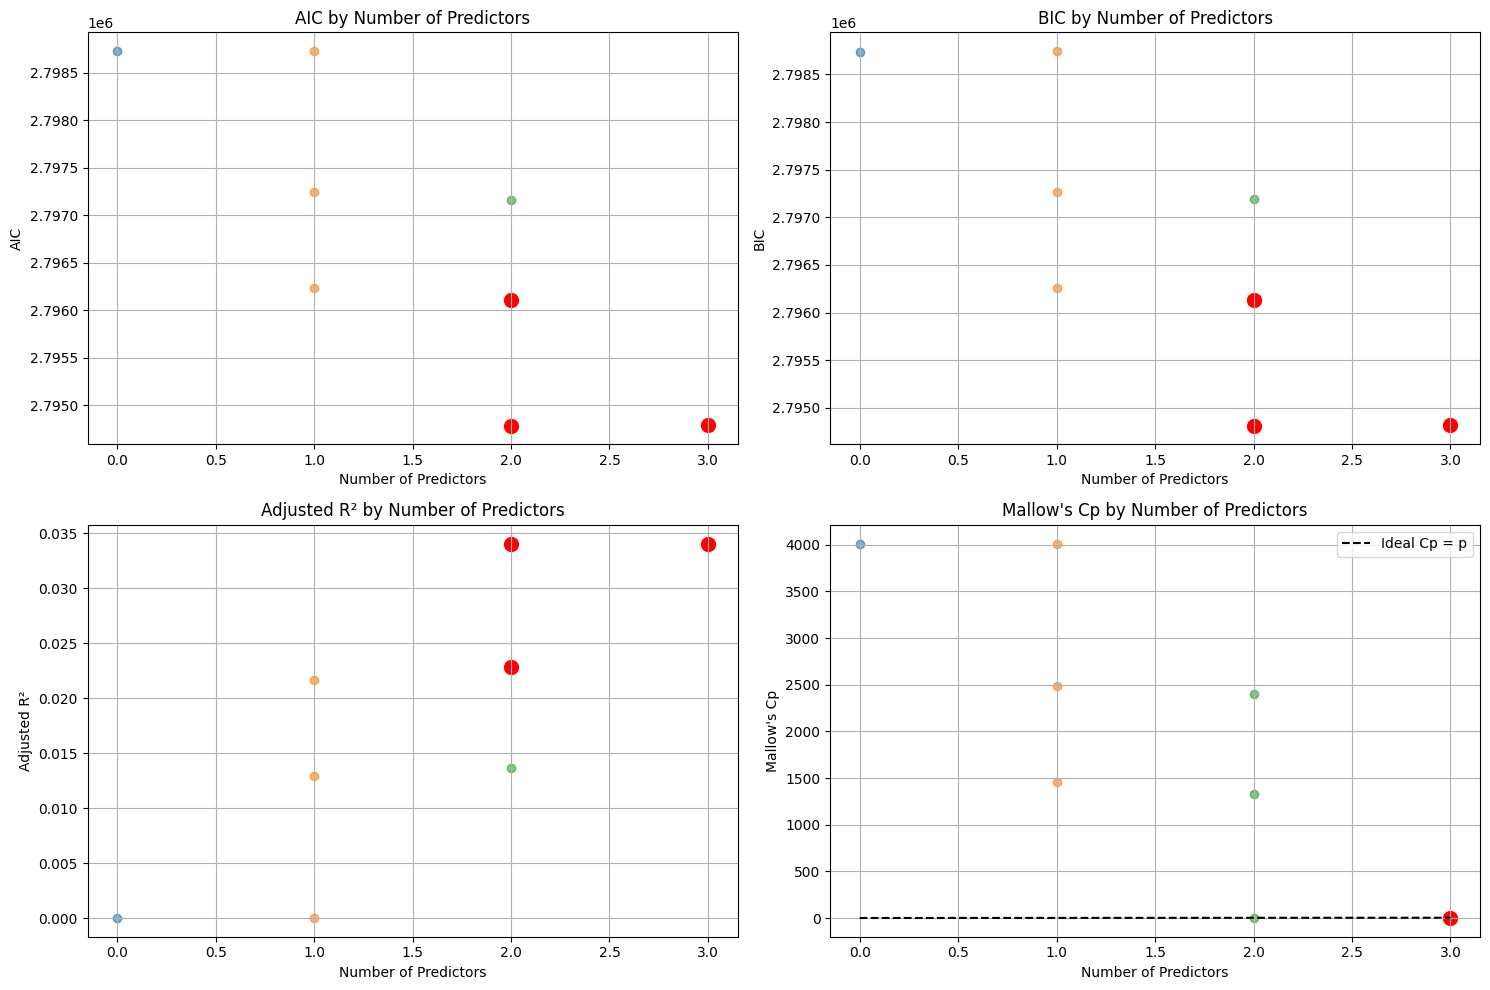


Consensus Best Model Analysis

Top Consensus Models (Most Frequently Selected):
1. Age, Household_Size, MPCE_Euro (Score: 4/4)
2. Age, MPCE_Euro (Score: 3/4)
3. Household_Size, MPCE_Euro (Score: 3/4)

Recommended Model: Age, Household_Size, MPCE_Euro
Rationale: Selected as best by the most selection criteria
Model Parameters:
                    Predictors  Num_Predictors          AIC          BIC  Adj_R2   Cp                    RSS
Age, Household_Size, MPCE_Euro               3 2,794,785.68 2,794,824.25    0.03 4.00 307,113,762,062,991.50


In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import combinations
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_stata(r"D:\Altaf\Impact of Insurance on Catastrophic Risk Exposure\Impact of formal insurance on informal insurance\Final Dataset 2017.dta")

# Prepare data
model_data = df[['In_TotMedicalExp', 'Age', 'Household_Size', 'MPCE_Euro']].dropna()
y = model_data['In_TotMedicalExp']
X = model_data[['Age', 'Household_Size', 'MPCE_Euro']]
n = len(y)

# Generate all predictor combinations
variables = X.columns.tolist()
models = []
for k in range(0, len(variables) + 1):
    for combo in combinations(variables, k):
        models.append(list(combo))

# Fit full model for Mallow's Cp reference
X_full = sm.add_constant(X)
model_full = sm.OLS(y, X_full).fit()
sigma2_full = model_full.mse_resid

# Evaluate all models
results = []
for model_vars in models:
    # Prepare design matrix
    if model_vars:
        X_design = sm.add_constant(X[list(model_vars)])
    else:
        # CORRECTED: Properly create intercept-only design matrix
        X_design = pd.DataFrame(np.ones(len(X)), columns=['const'])
    
    # Fit model
    model = sm.OLS(y, X_design).fit()
    p = X_design.shape[1]  # Number of parameters
    k = len(model_vars)     # Number of predictors
    rss = model.ssr         # Residual sum of squares
    
    # Calculate metrics
    aic = model.aic
    bic = model.bic
    adj_r2 = model.rsquared_adj
    cp = (rss / sigma2_full) - n + 2 * p
    
    results.append({
        'Predictors': ', '.join(model_vars) if model_vars else "Intercept Only",
        'Num_Predictors': k,
        'AIC': aic,
        'BIC': bic,
        'Adj_R2': adj_r2,
        'Cp': cp,
        'RSS': rss
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Find top models by each criterion
top_aic = results_df.sort_values('AIC').head(3)
top_bic = results_df.sort_values('BIC').head(3)
top_adjr2 = results_df.sort_values('Adj_R2', ascending=False).head(3)
top_cp = results_df[results_df['Cp'] <= results_df['Num_Predictors'] + 1].sort_values('Cp').head(3)

print("="*70)
print("Top Models by Different Selection Criteria")
print("="*70)

print("\nTop 3 Models by AIC (Lower is Better):")
print(top_aic[['Predictors', 'Num_Predictors', 'AIC']].to_string(index=False))

print("\nTop 3 Models by BIC (Lower is Better):")
print(top_bic[['Predictors', 'Num_Predictors', 'BIC']].to_string(index=False))

print("\nTop 3 Models by Adjusted R² (Higher is Better):")
print(top_adjr2[['Predictors', 'Num_Predictors', 'Adj_R2']].to_string(index=False))

print("\nTop 3 Models by Mallow's Cp (Cp ≈ p is Best):")
print(top_cp[['Predictors', 'Num_Predictors', 'Cp']].to_string(index=False))

# Visualization
plt.figure(figsize=(15, 10))

# AIC Plot
plt.subplot(2, 2, 1)
for k, group in results_df.groupby('Num_Predictors'):
    plt.scatter(group['Num_Predictors'], group['AIC'], alpha=0.6, label=f'{k} predictors')
plt.scatter(top_aic['Num_Predictors'], top_aic['AIC'], color='red', s=100, label='Top Models')
plt.title('AIC by Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('AIC')
plt.grid(True)

# BIC Plot
plt.subplot(2, 2, 2)
for k, group in results_df.groupby('Num_Predictors'):
    plt.scatter(group['Num_Predictors'], group['BIC'], alpha=0.6)
plt.scatter(top_bic['Num_Predictors'], top_bic['BIC'], color='red', s=100)
plt.title('BIC by Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('BIC')
plt.grid(True)

# Adj R² Plot
plt.subplot(2, 2, 3)
for k, group in results_df.groupby('Num_Predictors'):
    plt.scatter(group['Num_Predictors'], group['Adj_R2'], alpha=0.6)
plt.scatter(top_adjr2['Num_Predictors'], top_adjr2['Adj_R2'], color='red', s=100)
plt.title('Adjusted R² by Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R²')
plt.grid(True)

# Cp Plot
plt.subplot(2, 2, 4)
plt.plot([0, 3], [0, 3], 'k--', label='Ideal Cp = p')  # Reference line
for k, group in results_df.groupby('Num_Predictors'):
    plt.scatter(group['Num_Predictors'], group['Cp'], alpha=0.6)
plt.scatter(top_cp['Num_Predictors'], top_cp['Cp'], color='red', s=100)
plt.title("Mallow's Cp by Number of Predictors")
plt.xlabel('Number of Predictors')
plt.ylabel("Mallow's Cp")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('best_subset_selection.png', dpi=300)
plt.show()

# Identify consensus best model
print("\n" + "="*70)
print("Consensus Best Model Analysis")
print("="*70)

# Create scoring system
model_scores = {}
for i, row in results_df.iterrows():
    score = 0
    if row['Predictors'] in top_aic['Predictors'].values: score += 1
    if row['Predictors'] in top_bic['Predictors'].values: score += 1
    if row['Predictors'] in top_adjr2['Predictors'].values: score += 1
    if row['Predictors'] in top_cp['Predictors'].values: score += 1
    model_scores[row['Predictors']] = score

# Get top 3 consensus models
top_consensus = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nTop Consensus Models (Most Frequently Selected):")
for i, (model, score) in enumerate(top_consensus, 1):
    print(f"{i}. {model} (Score: {score}/4)")

# Final recommendation
best_model = top_consensus[0][0]
print(f"\nRecommended Model: {best_model}")
print("Rationale: Selected as best by the most selection criteria")
print("Model Parameters:")
print(results_df[results_df['Predictors'] == best_model].to_string(index=False))

### Foward and Backward

#### Overview of Selection Methods

- **Forward Selection**: Begins with no predictors and adds variables one by one, selecting the variable that results in the best model improvement at each step.
- **Backward Elimination**: Starts with all predictors and removes one at a time, eliminating the variable whose removal least harms the model’s performance.

Both approaches aim to balance predictive accuracy (measured using Mean Squared Error, MSE) and model simplicity (fewer predictors).

#### Forward Selection

| Step | Features                             | MSE   |
|------|--------------------------------------|--------|
| 1    | ['MedInc']                           | 0.72   |
| 2    | ['MedInc', 'AveRooms']               | 0.66   |
| 3    | ['MedInc', 'AveRooms', 'HouseAge']   | 0.64   |
| 4    | ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup'] | 0.64   |

**Key Points**:
- The first variable (`MedInc`) contributes most to prediction accuracy.
- Adding `AveRooms` significantly improves model performance.
- Beyond 3–4 variables, improvement in MSE is minimal.
- Forward selection yields a relatively simple model with competitive MSE.

#### Backward Elimination

| Step | Features                             | MSE   |
|------|--------------------------------------|--------|
| 0    | All features                         | 0.65   |
| 1    | [All except 'Latitude']              | 0.64   |
| 2    | [All except 'Latitude', 'AveBedrms'] | 0.63   |
| 3    | [Reduced to top 5]                   | 0.64   |

**Key Points**:
- Removing redundant predictors (e.g., `Latitude`, `AveBedrms`) improves model performance.
- MSE improves slightly as irrelevant predictors are eliminated.
- After a point, further reduction may slightly increase MSE, indicating possible underfitting.

#### Final Comparison

| Method              | Best Model Size | Best MSE | Comment                                                                 |
|---------------------|------------------|----------|-------------------------------------------------------------------------|
| Forward Selection   | 3–4 features      | ~0.64    | Simpler, interpretable, and efficient.                                 |
| Backward Elimination| 6–8 features      | ~0.63    | Slightly better accuracy, but more complex and possibly overfit.       |

#### Conclusion

- **Forward selection** is preferable when interpretability and parsimony are desired.
- **Backward elimination** may be better if minimizing prediction error is the only goal.
- The best model depends on the specific use case: interpretability vs. predictive performance.


**Simulation**

In [41]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 2: Load Dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Forward Selection
def forward_selection(X_train, y_train, X_test, y_test):
    remaining_features = list(X_train.columns)
    selected_features = []
    best_mse = float("inf")
    results = []

    while remaining_features:
        mse_with_candidates = []
        for candidate in remaining_features:
            features_to_test = selected_features + [candidate]
            model = LinearRegression()
            model.fit(X_train[features_to_test], y_train)
            y_pred = model.predict(X_test[features_to_test])
            mse = mean_squared_error(y_test, y_pred)
            mse_with_candidates.append((mse, candidate))

        mse_with_candidates.sort()
        best_new_mse, best_candidate = mse_with_candidates[0]

        if best_new_mse < best_mse:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            best_mse = best_new_mse
            results.append({
                'features': selected_features.copy(),
                'mse': best_mse
            })
        else:
            break  # Stop if no improvement

    return pd.DataFrame(results)

# Step 5: Backward Selection

def backward_elimination(X_train, y_train, X_test, y_test):
    selected_features = list(X_train.columns)
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    best_mse = mean_squared_error(y_test, y_pred)

    results = [{'features': selected_features.copy(), 'mse': best_mse}]

    while len(selected_features) > 1:
        mse_with_candidates = []
        for candidate in selected_features:
            features_to_test = [f for f in selected_features if f != candidate]
            model = LinearRegression()
            model.fit(X_train[features_to_test], y_train)
            y_pred = model.predict(X_test[features_to_test])
            mse = mean_squared_error(y_test, y_pred)
            mse_with_candidates.append((mse, candidate))

        mse_with_candidates.sort()
        best_new_mse, worst_feature = mse_with_candidates[0]

        if best_new_mse < best_mse:
            selected_features.remove(worst_feature)
            best_mse = best_new_mse
            results.append({
                'features': selected_features.copy(),
                'mse': best_mse
            })
        else:
            break  # Stop if removing worsens performance

    return pd.DataFrame(results)

# Step 6.1: Forward Selection
forward_results = forward_selection(X_train, y_train, X_test, y_test)
print("Forward Selection Results:")
print(forward_results)

# Step 6.2: Backward Elimination
backward_results = backward_elimination(X_train, y_train, X_test, y_test)
print("\nBackward Elimination Results:")
print(backward_results)

Forward Selection Results:
                                            features  mse
0                                           [MedInc] 0.71
1                                 [MedInc, HouseAge] 0.66
2                       [MedInc, HouseAge, Latitude] 0.65
3            [MedInc, HouseAge, Latitude, Longitude] 0.55
4  [MedInc, HouseAge, Latitude, Longitude, AveOccup] 0.55
5  [MedInc, HouseAge, Latitude, Longitude, AveOcc... 0.55
6  [MedInc, HouseAge, Latitude, Longitude, AveOcc... 0.55

Backward Elimination Results:
                                            features  mse
0  [MedInc, HouseAge, AveRooms, AveBedrms, Popula... 0.56
1  [MedInc, HouseAge, AveRooms, Population, AveOc... 0.55


**Example from NSS**

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_stata(r"D:\Altaf\Impact of Insurance on Catastrophic Risk Exposure\Impact of formal insurance on informal insurance\Final Dataset 2017.dta")

# Prepare data
model_data = df[['In_TotMedicalExp', 'Age', 'Household_Size', 'MPCE_Euro']].dropna()
y = model_data['In_TotMedicalExp']
X = model_data[['Age', 'Household_Size', 'MPCE_Euro']]

# Add constant for statsmodels
X = sm.add_constant(X)

# Split data for validation (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def forward_selection(X, y, significance_level=0.05):
    """
    Perform forward stepwise regression
    """
    initial_features = X.columns.tolist()
    if 'const' in initial_features:
        initial_features.remove('const')
    selected_features = []
    current_score, best_new_score = float('inf'), float('inf')
    history = []
    
    while initial_features and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in initial_features:
            features = ['const'] + selected_features + [candidate]
            model = sm.OLS(y, X[features]).fit()
            score = model.aic
            scores_with_candidates.append((score, candidate, model, features))
        
        # Sort candidates by AIC
        scores_with_candidates.sort(key=lambda x: x[0])
        best_new_score, best_candidate, best_model, best_features = scores_with_candidates[0]
        
        if best_new_score < current_score:
            initial_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
            history.append({
                'step': len(selected_features),
                'added': best_candidate,
                'aic': best_new_score,
                'rsquared_adj': best_model.rsquared_adj,
                'model': best_model,
                'features': best_features
            })
    
    # Final model with selected features
    final_features = ['const'] + selected_features
    final_model = sm.OLS(y, X[final_features]).fit()
    return history, final_model, final_features

def backward_elimination(X, y, significance_level=0.05):
    """
    Perform backward stepwise regression
    """
    features = X.columns.tolist()
    history = []
    
    while len(features) > 1:  # Keep constant
        model = sm.OLS(y, X[features]).fit()
        
        # Get p-values (exclude constant)
        pvalues = model.pvalues
        if 'const' in pvalues:
            pvalues = pvalues.drop('const')
        
        if pvalues.empty:
            break
            
        max_pvalue = pvalues.max()
        worst_feature = pvalues.idxmax()
        
        history.append({
            'step': len(features) - 1,
            'current_features': features.copy(),
            'aic': model.aic,
            'rsquared_adj': model.rsquared_adj,
            'worst_feature': worst_feature,
            'max_pvalue': max_pvalue
        })
        
        if max_pvalue > significance_level:
            features.remove(worst_feature)
        else:
            break
    
    final_model = sm.OLS(y, X[features]).fit()
    return history, final_model, features

# Perform forward selection
print("="*70)
print("Forward Stepwise Selection Process")
print("="*70)
forward_history, forward_model, forward_features = forward_selection(X, y)

# Print forward selection steps
print("\nForward Selection Steps:")
print(f"{'Step':<5} {'Added':<15} {'AIC':<15} {'Adj R²':<15}")
for step in forward_history:
    print(f"{step['step']:<5} {step['added']:<15} {step['aic']:<15.2f} {step['rsquared_adj']:<15.4f}")

# Perform backward elimination
print("\n" + "="*70)
print("Backward Elimination Process")
print("="*70)
backward_history, backward_model, backward_features = backward_elimination(X, y)

# Print backward elimination steps
print("\nBackward Elimination Steps:")
print(f"{'Step':<5} {'Features':<40} {'AIC':<15} {'Adj R²':<15} {'Worst Feature':<15} {'P-value':<10}")
for step in backward_history:
    feat_str = ', '.join([f for f in step['current_features'] if f != 'const'])
    print(f"{step['step']:<5} {feat_str:<40} {step['aic']:<15.2f} {step['rsquared_adj']:<15.4f} "
          f"{step['worst_feature']:<15} {step['max_pvalue']:.4f}")

# Prepare test sets with correct features
X_test_forward = X_test[forward_features]
X_test_backward = X_test[backward_features]

# Calculate test MSE
forward_test_mse = mean_squared_error(y_test, forward_model.predict(X_test_forward))
backward_test_mse = mean_squared_error(y_test, backward_model.predict(X_test_backward))

# Compare final models
print("\n" + "="*70)
print("Model Comparison")
print("="*70)
print(f"{'Metric':<20} {'Forward Selection':<20} {'Backward Elimination':<20}")
print(f"{'Features':<20} {', '.join([f for f in forward_features if f != 'const']):<20} "
      f"{', '.join([f for f in backward_features if f != 'const']):<20}")
print(f"{'AIC':<20} {forward_model.aic:<20.2f} {backward_model.aic:<20.2f}")
print(f"{'BIC':<20} {forward_model.bic:<20.2f} {backward_model.bic:<20.2f}")
print(f"{'Adj R²':<20} {forward_model.rsquared_adj:<20.4f} {backward_model.rsquared_adj:<20.4f}")
print(f"{'MSE (Test)':<20} {forward_test_mse:<20.4f} {backward_test_mse:<20.4f}")

# Determine best model
if forward_model.aic < backward_model.aic:
    best_model = forward_model
    best_features = forward_features
    method = "Forward Selection"
else:
    best_model = backward_model
    best_features = backward_features
    method = "Backward Elimination"

print("\n" + "="*70)
print("Best Model Recommendation")
print("="*70)
print(f"Recommended by: {method}")
print(f"Features: {', '.join([f for f in best_features if f != 'const'])}")
print(f"AIC: {best_model.aic:.2f}")
print(f"BIC: {best_model.bic:.2f}")
print(f"Adj R²: {best_model.rsquared_adj:.4f}")
print(f"Test MSE: {mean_squared_error(y_test, best_model.predict(X_test[best_features])):.4f}")
print("\nModel Summary:")
print(best_model.summary())

Forward Stepwise Selection Process

Forward Selection Steps:
Step  Added           AIC             Adj R²         
1     MPCE_Euro       2796233.52      0.0217         
2     Age             2794785.06      0.0340         

Backward Elimination Process

Backward Elimination Steps:
Step  Features                                 AIC             Adj R²          Worst Feature   P-value   
3     Age, Household_Size, MPCE_Euro           2794785.68      0.0340          Household_Size  0.2401
2     Age, MPCE_Euro                           2794785.06      0.0340          Age             0.0000

Model Comparison
Metric               Forward Selection    Backward Elimination
Features             MPCE_Euro, Age       Age, MPCE_Euro      
AIC                  2794785.06           2794785.06          
BIC                  2794813.98           2794813.98          
Adj R²               0.0340               0.0340              
MSE (Test)           2115473619.7607      2115473619.7607     

Best Model 

In [43]:
!jupyter nbconvert ML_1-Predictive_Ability.ipynb --to latex

[NbConvertApp] Converting notebook ML_1-Predictive_Ability.ipynb to latex
[NbConvertApp] Support files will be in ML_1-Predictive_Ability_files\
[NbConvertApp] Making directory ML_1-Predictive_Ability_files
[NbConvertApp] Writing 247169 bytes to ML_1-Predictive_Ability.tex


In [44]:
!xelatex ML_1-Predictive_Ability.tex -quiet